In [1]:
name_entity0 = []
fr = open('/Users/meng/Desktop/csranking.txt','rb')
fr.readline()
for line in fr:
	arr = line.strip('\r\n').split('\t')
	name = arr[1]
	entity = name[4:-4]
	entity = entity.replace('Univ.','University')
	name_entity0.append([name,entity,float(arr[2]),int(arr[3])]) # ranking_score, faculty
fr.close()
print '--> Number of Institutions (csranking):',len(name_entity0)

--> Number of Institutions (csranking): 126


In [2]:
name_entity1 = []
fr = open('/Users/meng/Desktop/cssalary.txt','rb')
fr.readline()
fr.readline()
for line in fr:
	arr = line.strip('\r\n').split('\t')
	name = arr[2]
	entity = name
	if ' - Main Campus' in entity:
		entity = entity[:-14]
	if ' (' in entity:
		pos0 = entity.find(' (')
		pos1 = entity.find(')')
		entity = entity[0:pos0]+entity[pos1+1:]
	name_entity1.append([name,entity,int(arr[3][1:].replace(',',''))]) # salary
fr.close()
print '--> Number of Institutions (cssalary):',len(name_entity1)

--> Number of Institutions (cssalary): 466


In [3]:
entity2count = {}
for [name,entity,ranking_score,faculty] in name_entity0:
	if not entity in entity2count:
		entity2count[entity] = 0
	entity2count[entity] += 1
for [name,entity,salary] in name_entity1:
	if not entity in entity2count:
		entity2count[entity] = 0
	entity2count[entity] += 1
entityset = set()
for [entity,count] in sorted(entity2count.items(),key=lambda x:x[0]):
	if count == 2: entityset.add(entity)
	print entity	
print '--> Number of Institutions (integrated):',len(entityset)

Albright College
American University - Washington D.C.
Angelo State University
Appalachian State University
Arizona State University
Arkansas State University
Arkansas Tech University
Athens State University
Auburn University
Augusta State University
Aurora University
Austin Peay State University
Azusa Pacific University
Ball State University
Barry University
Baruch College
Baylor University
Bellevue University - Bellevue, NE
Bentley University
Binghamton University
Bloomsburg University of Pennsylvania
Boise State University
Boston College
Boston University
Bowling Green State University - Bowling Green, OH
Bradley University
Brandeis University
Bridgewater State College
Brigham Young University
Brooklyn College
Brown University
Bryant University
Bucknell University
Buffalo State College
CUNY
CUNY - Hunter College
CUNY - Queens College
California Institute of Technology
California Polytechnic State University - San Luis Obispo
California State Polytechnic University - Pomona
Californi

University of Pennsylvania
University of Pittsburgh
University of Puget Sound
University of Redlands
University of Rhode Island
University of Rochester
University of San Francisco
University of Scranton
University of South Alabama
University of South Carolina
University of South Dakota
University of South Florida
University of Southern California
University of Southern Indiana
University of Southern Maine
University of Southern Mississippi
University of St. Thomas - St Paul, MN
University of Tennessee
University of Tennessee at Chattanooga
University of Texas - Austin
University of Texas - Pan American
University of Texas at Arlington
University of Texas at Austin
University of Texas at Dallas
University of Texas at El Paso
University of Texas at San Antonio
University of Texas at Tyler
University of Toledo
University of Tulsa
University of Utah
University of Vermont
University of Virginia
University of Washington
University of West Florida
University of Wisconsin - Eau Claire
Universi

In [4]:
entity2features = {} # ranking_score, faculty, salary
for [name,entity,ranking_score,faculty] in name_entity0:
	if not entity in entityset: continue
	if not entity in entity2features:
		entity2features[entity] = [-1,-1,-1]
	entity2features[entity][0] = ranking_score
	entity2features[entity][1] = faculty
for [name,entity,salary] in name_entity1:
	if not entity in entityset: continue
	if not entity in entity2features:
		entity2features[entity] = [-1,-1,-1]
	entity2features[entity][2] = salary

_data_ = []
for [entity,[ranking_score,faculty,salary]] in sorted(entity2features.items(),key=lambda x:-x[1][0]):
	_data_.append([entity,ranking_score,faculty,salary])
	print entity,ranking_score,faculty,salary

Carnegie Mellon University 18.5 150 92200
Massachusetts Institute of Technology 12.2 82 94100
University of California - Berkeley 10.9 81 97000
Stanford University 10.9 54 101000
University of Illinois at Urbana-Champaign 9.9 84 81600
University of Washington 8.3 56 79600
University of California - San Diego 6.9 54 84500
Georgia Institute of Technology 6.8 75 77700
University of Wisconsin - Madison 5.9 47 70200
Columbia University 5.8 47 86400
University of Pennsylvania 5.6 46 90500
University of Southern California 5.5 49 78400
Princeton University 5.3 51 93400
University of Maryland - College Park 5.2 44 75300
University of California - Los Angeles 5.0 37 80600
Northeastern University 4.8 54 72100
Purdue University 4.8 51 64000
New York University 4.5 47 78200
Harvard University 4.2 29 85300
University of California - Irvine 4.2 54 74100
University of California - Santa Barbara 3.5 25 79800
Pennsylvania State University 3.4 31 65000
University of Utah 3.4 39 65600
University of Calif

In [5]:
import pandas as pd
import numpy as np

In [6]:
pairs = []
for [entity,ranking_score,faculty,salary] in _data_:
	pairs.append((ranking_score,faculty))
data = (pd.DataFrame(pairs))
print '--> ranking_score vs faculty:'
print np.cov(data,rowvar=False)[0][1]
print np.corrcoef(data,rowvar=False)[0][1]

pairs = []
for [entity,ranking_score,faculty,salary] in _data_:
	pairs.append((ranking_score,salary))
data = (pd.DataFrame(pairs))
print '--> ranking_score vs salary:'
print np.cov(data,rowvar=False)[0][1]
print np.corrcoef(data,rowvar=False)[0][1]

pairs = []
for [entity,ranking_score,faculty,salary] in _data_:
	pairs.append((faculty,salary))
data = (pd.DataFrame(pairs))
print '--> faculty vs salary:'
print np.cov(data,rowvar=False)[0][1]
print np.corrcoef(data,rowvar=False)[0][1]

--> ranking_score vs faculty:
62.7393258427
0.948646216945
--> ranking_score vs salary:
20541.9662921
0.646149576377
--> faculty vs salary:
149469.363296
0.58711039767


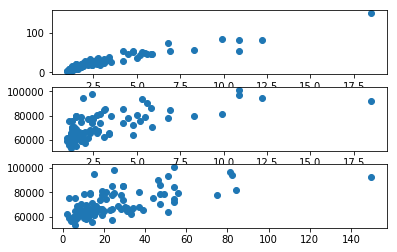

In [7]:
import matplotlib.pyplot as plt

list_ranking_score = []
list_faculty = []
list_salary = []
for [entity,ranking_score,faculty,salary] in _data_:
	list_ranking_score.append(ranking_score)
	list_faculty.append(faculty)
	list_salary.append(salary)
plt.figure()
plt.subplot(311)
pdscatter = plt.scatter(list_ranking_score,list_faculty)
plt.subplot(312)
pdscatter = plt.scatter(list_ranking_score,list_salary)
plt.subplot(313)
pdscatter = plt.scatter(list_faculty,list_salary)
plt.show()